In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline  
# plots automatically without requiring plot()

# Setting the max number of rows and columns to be displayed
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500)


In [2]:
train_final = pd.read_csv("train_final.csv")
test_final = pd.read_csv("test_final.csv")

In [3]:
# combining the training and testing data set to track trends more effectively
# creating a label for the training and testing set

train_final['source']='train'
test_final['source']='test'

data = pd.concat([train_final, test_final],ignore_index=True)
print (train_final.shape, test_final.shape, data.shape)

(2188, 24) (3187, 24) (5375, 24)


In [4]:
data.head()

,Unnamed: 0,belongs_to_collection,budget,id,imdb_id,original_title,overview,popularity,poster_path,release_date,revenue,runtime,status,tagline,title,is_english_original_language,is_US,has_homepage,total_production_companies,total_Keywords,total_crew,cast_power,genre_power,source
0,0,1,14000000,1,tt2637294,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2/20/15,12314651.0,93.0,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,1,1,0,3,4,72,62,9,train
1,1,1,40000000,2,tt0368933,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,8/6/04,95149435.0,113.0,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,1,1,0,1,4,9,20,26,train
2,2,0,3300000,3,tt2582802,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,10/10/14,13092000.0,105.0,Released,The road to greatness can take you to the edge.,Whiplash,1,1,1,3,12,64,52,10,train
3,3,0,1200000,4,tt1821480,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,3/9/12,16000000.0,122.0,Released,NaN,Kahaani,0,0,1,0,7,3,20,18,train
4,5,0,8000000,6,tt0093743,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,/6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg,8/6/87,3261638.0,83.0,Released,NaN,Pinocchio and the Emperor of the Night,1,0,0,0,0,11,20,6,train


C:\Users\hozir\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hozir\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\hozir\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0.5, 1.0, 'Revenue Distribution')

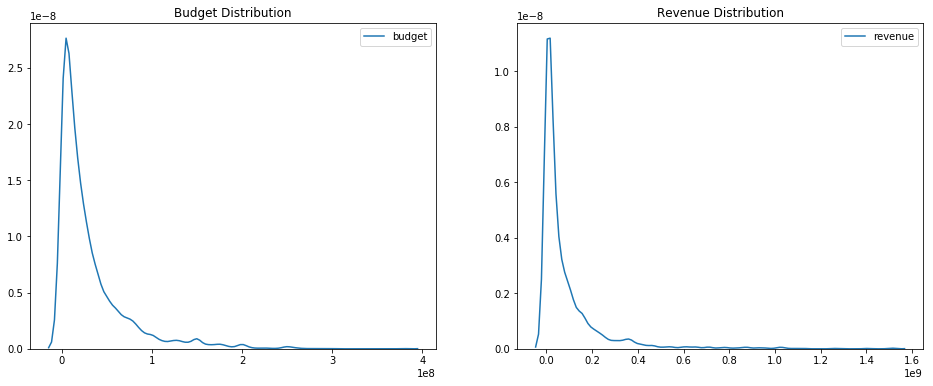

In [5]:
fig, ax = plt.subplots(2,2, figsize = (16, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(data['budget'])
plt.title('Budget Distribution')
plt.subplot(1, 2, 2)
sns.kdeplot(data['revenue'])
plt.title('Revenue Distribution')

Text(0.5, 1.0, 'Revenue X Budget')

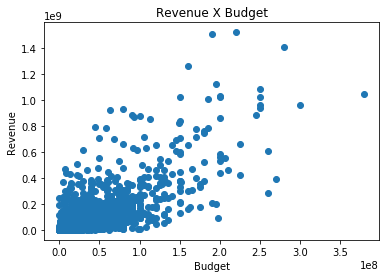

In [6]:
plt.scatter(x = data['budget'], y=data['revenue'])
plt.ylabel('Revenue')
plt.xlabel('Budget')
plt.title('Revenue X Budget')

Text(0.5, 1.0, 'Production Country X Revenue')

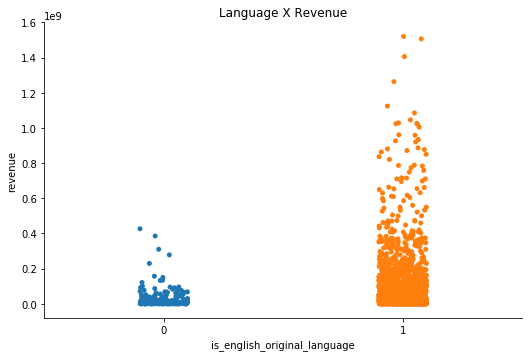

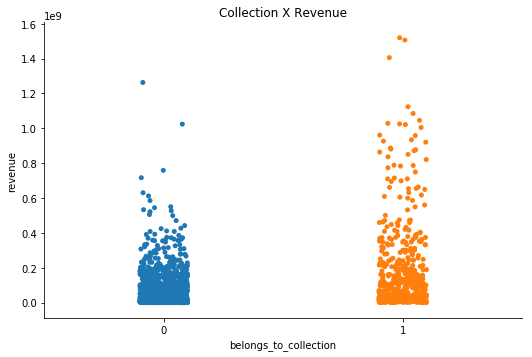

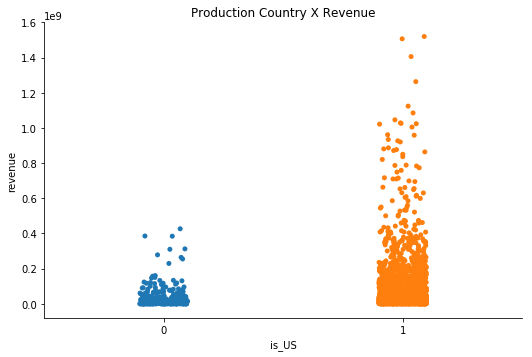

In [7]:
sns.catplot(x='is_english_original_language', y='revenue', data=data, aspect=1.5)
plt.title('Language X Revenue')
sns.catplot(x='belongs_to_collection', y='revenue', data=data, aspect=1.5)
plt.title('Collection X Revenue')
sns.catplot(x='is_US', y='revenue', data=data, aspect=1.5)
plt.title('Production Country X Revenue')


Text(0.5, 1.0, 'Popularity X Revenue')

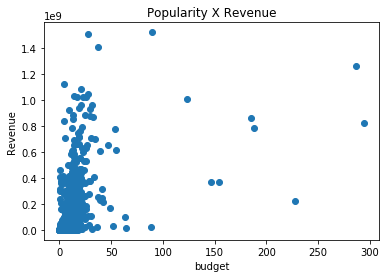

In [8]:
plt.scatter(x = data['popularity'], y=data['revenue'])
plt.ylabel('Revenue')
plt.xlabel('budget')
plt.title('Popularity X Revenue')

Text(0.5, 1.0, 'Runtime X Revenue')

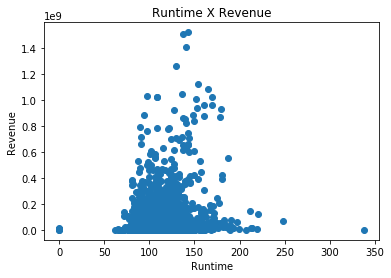

In [9]:
plt.scatter(x = data['runtime'], y=data['revenue'])
plt.ylabel('Revenue')
plt.xlabel('Runtime')
plt.title('Runtime X Revenue')

Text(0.5, 1.0, 'Production Companies X Revenue')

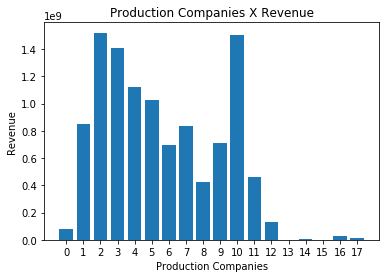

In [10]:
plt.xticks(np.arange(0, 18, 1))
plt.bar(x = data['total_production_companies'], height = data['revenue'])
plt.ylabel('Revenue')
plt.xlabel('Production Companies')
plt.title('Production Companies X Revenue')

Text(0.5, 1.0, 'Genre Power X Revenue')

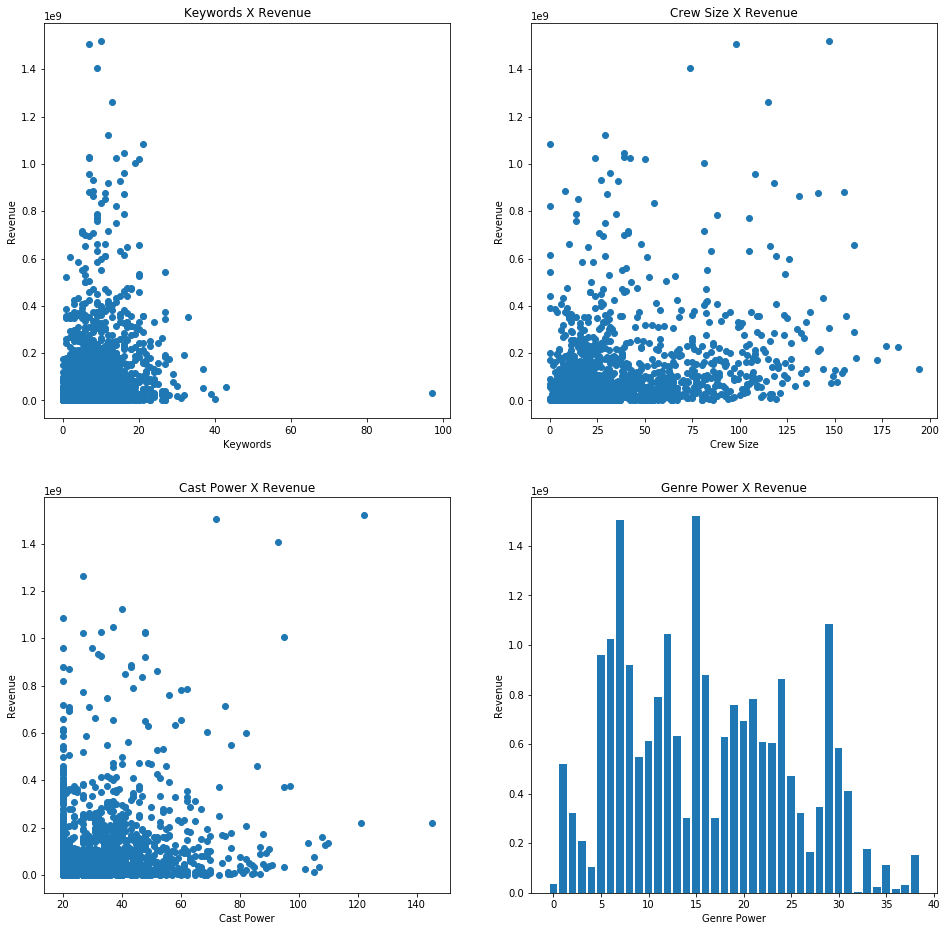

In [11]:
fig, ax = plt.subplots(2,4, figsize = (16, 16))

plt.subplot(2, 2, 1)
plt.scatter(data['total_Keywords'], data['revenue'])
plt.ylabel('Revenue')
plt.xlabel('Keywords')
plt.title('Keywords X Revenue')

plt.subplot(2, 2, 2)
plt.scatter(data['total_crew'], data['revenue'])
plt.ylabel('Revenue')
plt.xlabel('Crew Size')
plt.title('Crew Size X Revenue')

plt.subplot(2, 2, 3)
plt.scatter(data['cast_power'], data['revenue'])
plt.ylabel('Revenue')
plt.xlabel('Cast Power')
plt.title('Cast Power X Revenue')

plt.subplot(2, 2, 4)
plt.bar(x = data['genre_power'], height = data['revenue'])
plt.ylabel('Revenue')
plt.xlabel('Genre Power')
plt.title('Genre Power X Revenue')

In [12]:
corr = data.corr()
corr['revenue'].sort_values(ascending=False).head(20) #the top 20 features positively correlated to our target

revenue                         1.000000
budget                          0.739841
popularity                      0.444521
belongs_to_collection           0.351119
total_crew                      0.347035
has_homepage                    0.271767
cast_power                      0.215052
runtime                         0.206727
is_US                           0.183924
total_Keywords                  0.180263
total_production_companies      0.142934
is_english_original_language    0.140980
genre_power                     0.000650
id                             -0.002667
Unnamed: 0                     -0.002667
Name: revenue, dtype: float64